In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('./North_American_Superstore.csv',sep=',', encoding = "gbk")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2015-103800,2015/1/3,2015/1/7,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2015-141817,2015/1/5,2015/1/12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
data.rename(columns = lambda x : x.replace(' ',''),inplace = True)

## 1. Data preparing 

# Delect duplicated data

In [5]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         9994 non-null   int64  
 1   OrderID       9994 non-null   object 
 2   OrderDate     9994 non-null   object 
 3   ShipDate      9994 non-null   object 
 4   ShipMode      9994 non-null   object 
 5   CustomerID    9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  PostalCode    9983 non-null   float64
 12  Region        9994 non-null   object 
 13  ProductID     9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  ProductName   9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

# Find abnormal vaule 

In [6]:
data.loc[data['Sales']<=0].Sales.count()

0

In [7]:
data = data.loc[(data['Sales']>0)&(data['Quantity']>0)]
data.head()


,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,7981,CA-2015-103800,2015/1/3,2015/1/7,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2015-141817,2015/1/5,2015/1/12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## Change the orderdate format to datetime 64 



In [8]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
print('First date:',data['OrderDate'].min(), 'Last date:', data['OrderDate'].max())
data.info()

First date: 2015-01-03 00:00:00 Last date: 2018-12-30 00:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   object        
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9983 non-null   float64       
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-nu

## 2. Create the RFM model for estimate custumer values 


## F (Frequency)  Times of different customers sales

In [9]:
dF=data.copy()

In [10]:
dF.drop_duplicates(subset=['OrderID'],keep='first',inplace=True)  #  for find the frequency by orderid that mean the customer consume one time
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         5009 non-null   int64         
 1   OrderID       5009 non-null   object        
 2   OrderDate     5009 non-null   datetime64[ns]
 3   ShipDate      5009 non-null   object        
 4   ShipMode      5009 non-null   object        
 5   CustomerID    5009 non-null   object        
 6   CustomerName  5009 non-null   object        
 7   Segment       5009 non-null   object        
 8   Country       5009 non-null   object        
 9   City          5009 non-null   object        
 10  State         5009 non-null   object        
 11  PostalCode    5003 non-null   float64       
 12  Region        5009 non-null   object        
 13  ProductID     5009 non-null   object        
 14  Category      5009 non-null   object        
 15  Sub-Category  5009 non-null   object  

In [11]:
fre = dF.groupby('CustomerID',as_index=False).OrderID.count().rename(columns = {'OrderID':'Frequency'})
fre.set_index('CustomerID',drop=True,inplace=True)
fre.head()

,Frequency
CustomerID,
AA-10315,5
AA-10375,9
AA-10480,4
AA-10645,6
AB-10015,3


## R (rencency) M (Monetary)

In [12]:
# recency (the number of day that customer last cumsume ) 
# M sales and can show the profit.
df_group = data.groupby('CustomerID')
Odate = df_group.OrderDate.max()
df_rm = df_group.agg({'Sales':"sum",'Profit':'sum'}).rename(columns={'Sales':'Monetary'})
df_rm['Rencency'] = (pd.to_datetime('2019-01-01')-Odate).dt.days 
df_rm

,Monetary,Profit,Rencency
CustomerID,,,
AA-10315,5563.560,-362.8825,186
AA-10375,1056.390,277.3824,21
AA-10480,1790.512,435.8274,261
AA-10645,5086.935,857.8033,57
AB-10015,886.156,129.3465,417
...,...,...,...
XP-21865,2374.658,621.2300,45
YC-21895,5454.350,1305.6290,6
YS-21880,6720.444,1778.2923,11


## redefine frequency

In [13]:
dyears =  df_group.agg({'OrderDate':(lambda df :df.dt.year.max()-df.dt.year.min()+1)}).rename(
    columns={'OrderDate':'DiffYears'}).DiffYears

fre.Frequency = fre.Frequency/dyears

In [14]:
fre.head()

,Frequency
CustomerID,
AA-10315,1.25
AA-10375,2.25
AA-10480,1.00
AA-10645,1.50
AB-10015,1.00


## Concate to RFM dataframe 

In [15]:
RFM = df_rm.merge(fre, on='CustomerID')
RFM.head() 

,Monetary,Profit,Rencency,Frequency
CustomerID,,,,
AA-10315,5563.560,-362.8825,186,1.25
AA-10375,1056.390,277.3824,21,2.25
AA-10480,1790.512,435.8274,261,1.00
AA-10645,5086.935,857.8033,57,1.50
AB-10015,886.156,129.3465,417,1.00


## Base on the RFM data to classcifly type of customer 

In [16]:
rm= RFM['Rencency'].median()
fm= RFM['Frequency'].median()
mm= RFM['Monetary'].median()
rm,fm,mm

(77.0, 1.75, 2256.394)

## 说明：
## 重要价值客户（111）：最近消费时间近、消费频次和消费金额都很高，必须是VIP啊！
## 重要保持客户（011）：最近消费时间较远，但消费频次和金额都很高，说明这是个一段时间没来的忠诚客户，我们需要主动和他保持联系。
## 重要发展客户（101）：最近消费时间较近、消费金额高，但频次不高，忠诚度不高，很有潜力的用户，必须重点发展。
## 重要挽留客户（001）：最近消费时间较远、消费频次不高，但消费金额高的用户，可能是将要流失或者已经要流失的用户，应当给予挽留措施。

In [17]:
def customer_type_func(frame): 
    customer_type_list = []
    for i in range(len(frame)):
        if frame.iloc[i,2]>=rm and frame.iloc[i,3]>=fm and frame.iloc[i,0]>=mm:
            customer_type_list.append('重要价值客户')
        elif  frame.iloc[i,2]>=rm and frame.iloc[i,3]<fm and frame.iloc[i,0]>=mm:
            customer_type_list.append('重要发展客户')
        elif  frame.iloc[i,2]<rm and frame.iloc[i,3]>=fm and frame.iloc[i,0]>=mm:
            customer_type_list.append('重要保持客户')
        elif  frame.iloc[i,2]<rm and frame.iloc[i,3]<fm and frame.iloc[i,0]>=mm:
            customer_type_list.append('重要挽留客户')
        else:
            customer_type_list.append('一般客户')
    frame['CustomerType'] = customer_type_list

In [18]:
customer_type_func(RFM)

In [19]:
RFM.head()

,Monetary,Profit,Rencency,Frequency,CustomerType
CustomerID,,,,,
AA-10315,5563.560,-362.8825,186,1.25,重要发展客户
AA-10375,1056.390,277.3824,21,2.25,一般客户
AA-10480,1790.512,435.8274,261,1.00,一般客户
AA-10645,5086.935,857.8033,57,1.50,重要挽留客户
AB-10015,886.156,129.3465,417,1.00,一般客户


In [34]:
RFM['Protype'] = (RFM.Profit>0)
class_pro = RFM.groupby(['CustomerType','Protype']).size().reset_index(name='num')


## 当利润是正值（True）时每类型客户数量

In [80]:
class_pro_true = class_pro[class_pro.Protype == True]
class_pro_true = class_pro_true.sort_values(by='num' ,ascending=False)
class_pro_true.index = range(5)

In [77]:
all_cus = RFM.groupby('CustomerType').size().reset_index(name='num')
all_cus = all_cus.sort_values(by='num' ,ascending=False)
all_cus

In [79]:
all_cus['num']

0    396
1    176
2    118
3     52
4     51
Name: num, dtype: int64

##

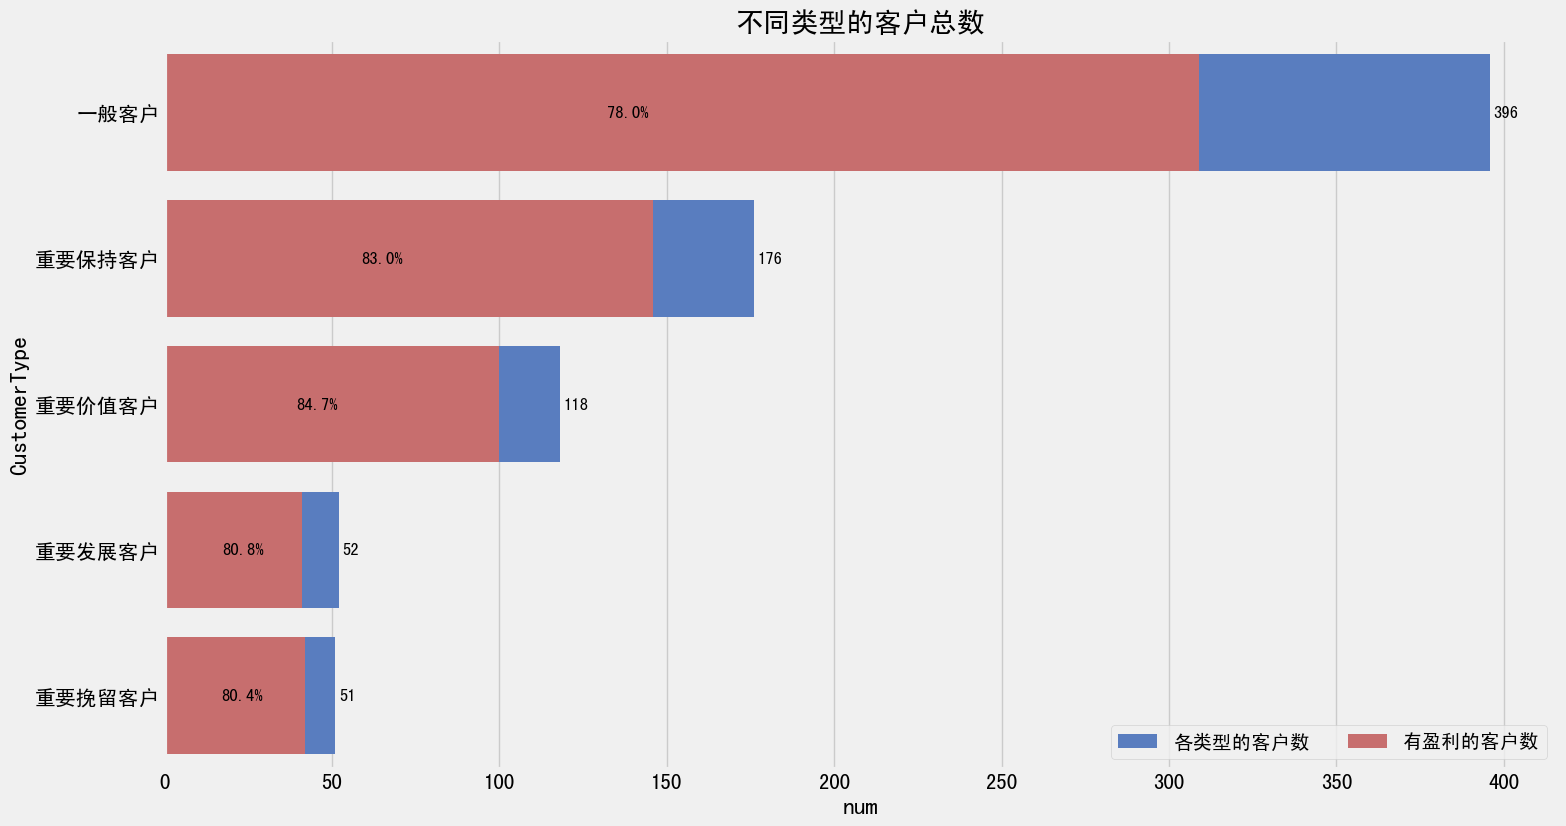

In [85]:
fig1 = plt.figure(1,figsize=(16,9),dpi=100)
ax1_1 = fig1.add_subplot(111)
sns.barplot(x="num", y='CustomerType', data=all_cus, order = all_cus['CustomerType'],
           label="各类型的客户数", color="b")
ax1_1.tick_params(labelsize=15)
ax1_1.set_title('不同类型的客户总数',fontsize=20)
ax1_1.set_xlabel('')
ax1_1.set_ylabel('')
num_by_type=list(RFM.groupby('CustomerType').size())
num_by_type=sorted(num_by_type,reverse=True)
for x,y in enumerate(num_by_type):
    ax1_1.text(y+1,x,'%s' %y,va='center',size=12)
sns.set_color_codes("muted")
sns.barplot(x="num", y='CustomerType', data=class_pro_true, order = all_cus['CustomerType'],
           label="有盈利的客户数", color="r")
ax1_1.legend(ncol=2, loc="lower right", frameon=True)
for x,y in enumerate(num_by_type):
    ax1_1.text((y)/3,x, '%.1f%%' %(class_pro_true['num'][x]/all_cus['num'][x]*100),va='center',size=12)